# Import datajoint module and ibl pipeline modules

In [1]:
import datajoint as dj
from ibl_pipeline import reference, subject, action, acquisition, data

Connecting shan@datajoint-rds.cyuksi65nrdq.us-east-1.rds.amazonaws.com:3306


# ERD

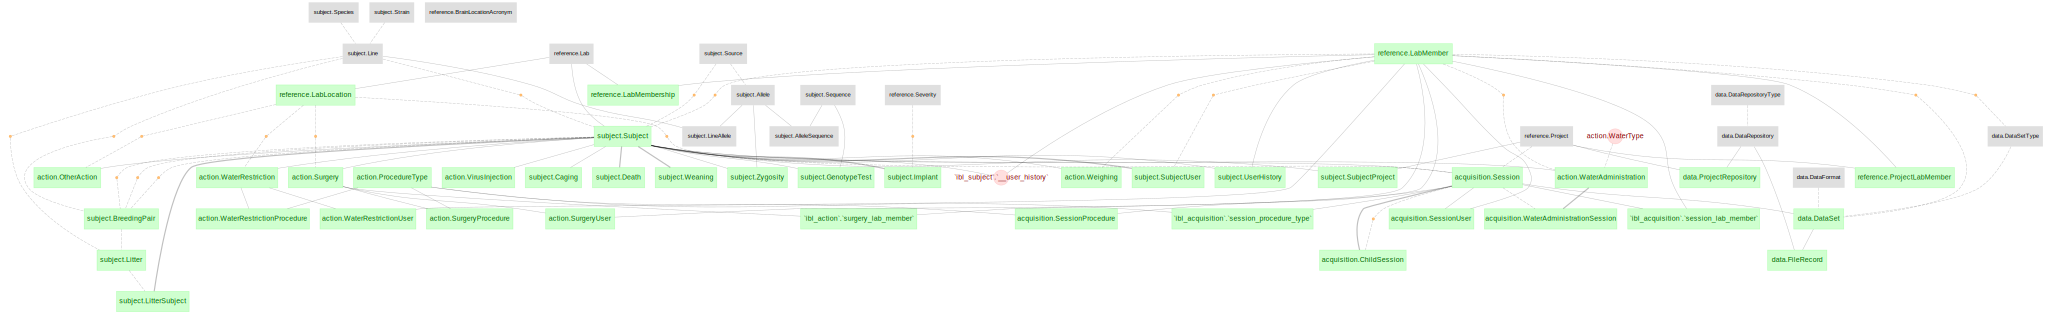

In [2]:
dj.ERD(subject.schema) + dj.ERD(reference.schema) + \
dj.ERD(action.schema) + dj.ERD(acquisition.schema) + dj.ERD(data.schema)

# Query example- subject.Subject

## All subjects

In [3]:
subject.Subject()

lab_name name of lab,subject_nickname nickname,subject_uuid,sex sex,subject_birth_date birth date,ear_mark ear mark,subject_line name,subject_source name of source,responsible_user username,protocol_number protocol number,subject_description
angelakilab,IBL-T1,cff66dc1-765e-4e04-abef-92de05bf4f19,M,2018-11-27,1,None,None,jeanpaul,1,None
angelakilab,IBL-T2,f498ba9d-d983-43fd-b8c1-b22ec919018e,F,2018-11-27,2,None,None,jeanpaul,1,None
angelakilab,IBL-T3,95241a9c-481b-443c-83a7-462165f729ec,F,2018-11-27,3,None,None,jeanpaul,1,None
angelakilab,IBL-T4,34ff50d4-42cf-41f7-8c38-ab631ca84d74,F,2018-11-27,4,None,None,jeanpaul,1,None
churchlandlab,CSHL_001,ecba4914-30c3-4a0b-9d65-1ef5d80ca5f2,M,2018-11-20,right ear,None,None,chrisk,3,None
churchlandlab,CSHL_002,4c9577b3-bdd5-4a15-b15b-5bc24a4439d3,M,2018-11-20,left ear,None,None,chrisk,3,None
churchlandlab,CSHL_003,6e1e46eb-a742-4385-926c-db14a8f9347f,M,2018-11-20,LR,C57BL/6J,Jax,anneu,3,None


## Subjects born after a certain date

In [5]:
subject.Subject & 'subject_birth_date > "2018-08-23"'

lab_name name of lab,subject_nickname nickname,subject_uuid,sex sex,subject_birth_date birth date,ear_mark ear mark,subject_line name,subject_source name of source,responsible_user username,protocol_number protocol number,subject_description
angelakilab,IBL-T1,cff66dc1-765e-4e04-abef-92de05bf4f19,M,2018-11-27,1,None,None,jeanpaul,1,None
angelakilab,IBL-T2,f498ba9d-d983-43fd-b8c1-b22ec919018e,F,2018-11-27,2,None,None,jeanpaul,1,None
angelakilab,IBL-T3,95241a9c-481b-443c-83a7-462165f729ec,F,2018-11-27,3,None,None,jeanpaul,1,None
angelakilab,IBL-T4,34ff50d4-42cf-41f7-8c38-ab631ca84d74,F,2018-11-27,4,None,None,jeanpaul,1,None
churchlandlab,CSHL_001,ecba4914-30c3-4a0b-9d65-1ef5d80ca5f2,M,2018-11-20,right ear,None,None,chrisk,3,None
churchlandlab,CSHL_002,4c9577b3-bdd5-4a15-b15b-5bc24a4439d3,M,2018-11-20,left ear,None,None,chrisk,3,None
churchlandlab,CSHL_003,6e1e46eb-a742-4385-926c-db14a8f9347f,M,2018-11-20,LR,C57BL/6J,Jax,anneu,3,None


## Subject born within a date range

In [11]:
subject.Subject & 'subject_birth_date between "2018-08-13" and "2018-12-31"'

lab_name name of lab,subject_nickname nickname,subject_uuid,sex sex,subject_birth_date birth date,ear_mark ear mark,subject_line name,subject_source name of source,responsible_user username,protocol_number protocol number,subject_description
angelakilab,IBL-T1,cff66dc1-765e-4e04-abef-92de05bf4f19,M,2018-11-27,1,None,None,jeanpaul,1,None
angelakilab,IBL-T2,f498ba9d-d983-43fd-b8c1-b22ec919018e,F,2018-11-27,2,None,None,jeanpaul,1,None
angelakilab,IBL-T3,95241a9c-481b-443c-83a7-462165f729ec,F,2018-11-27,3,None,None,jeanpaul,1,None
angelakilab,IBL-T4,34ff50d4-42cf-41f7-8c38-ab631ca84d74,F,2018-11-27,4,None,None,jeanpaul,1,None
churchlandlab,CSHL_001,ecba4914-30c3-4a0b-9d65-1ef5d80ca5f2,M,2018-11-20,right ear,None,None,chrisk,3,None
churchlandlab,CSHL_002,4c9577b3-bdd5-4a15-b15b-5bc24a4439d3,M,2018-11-20,left ear,None,None,chrisk,3,None
churchlandlab,CSHL_003,6e1e46eb-a742-4385-926c-db14a8f9347f,M,2018-11-20,LR,C57BL/6J,Jax,anneu,3,None


## Subjects that has been genotyped

In [6]:
subject.Subject & subject.GenotypeTest

lab_name name of lab,subject_nickname nickname,subject_uuid,sex sex,subject_birth_date birth date,ear_mark ear mark,subject_line name,subject_source name of source,responsible_user username,protocol_number protocol number,subject_description
cortexlab,ALK081,c68cf5d5-e75a-46f1-8eda-a2db78cf4743,F,2018-04-13,ML,Pvalb-IRES-Cre,None,armin,3,perfused by HF
cortexlab,ALK082,64c1bdd9-d82f-435f-ac30-fc8032c6e119,M,2018-07-16,TR,Pvalb-IRES-Cre,None,armin,3,None
cortexlab,CR_IBL1,ff1d0657-a5fa-4042-be77-b63758c8cb11,F,2018-10-07,None,Sst-IRES-Cre,Cruciform BSU,nick,3,culled by HF
cortexlab,CR_IBL2,9317beff-b3c3-42d2-8c3c-85b2f63b68f3,F,2018-10-07,None,Sst-IRES-Cre,Cruciform BSU,nick,3,culled by HF
cortexlab,KS001,a4ec3fa0-5415-490a-bf2b-cbf07b017733,M,2018-10-16,TL,TetO-GCaMP6s,Jax,Karolina_Socha,3,None
cortexlab,LEW008,faf159e2-1f4e-4477-8079-1a55fe5386a9,M,2018-05-01,TR,tetO-G6s x CaMK-tTA,Cruciform BSU,lauren,3,MISSING END OF TAIL
cortexlab,LEW009,8e181135-7106-43c1-9cda-d854856e6d95,M,2018-05-01,TL,tetO-G6s x CaMK-tTA,Cruciform BSU,lauren,1,None


## Subjects that has not been genotyped

In [10]:
subject.Subject - subject.GenotypeTest

lab_name name of lab,subject_nickname nickname,subject_uuid,sex sex,subject_birth_date birth date,ear_mark ear mark,subject_line name,subject_source name of source,responsible_user username,protocol_number protocol number,subject_description
angelakilab,IBL-T1,cff66dc1-765e-4e04-abef-92de05bf4f19,M,2018-11-27,1,None,None,jeanpaul,1,None
angelakilab,IBL-T2,f498ba9d-d983-43fd-b8c1-b22ec919018e,F,2018-11-27,2,None,None,jeanpaul,1,None
angelakilab,IBL-T3,95241a9c-481b-443c-83a7-462165f729ec,F,2018-11-27,3,None,None,jeanpaul,1,None
angelakilab,IBL-T4,34ff50d4-42cf-41f7-8c38-ab631ca84d74,F,2018-11-27,4,None,None,jeanpaul,1,None
churchlandlab,CSHL_001,ecba4914-30c3-4a0b-9d65-1ef5d80ca5f2,M,2018-11-20,right ear,None,None,chrisk,3,None
churchlandlab,CSHL_002,4c9577b3-bdd5-4a15-b15b-5bc24a4439d3,M,2018-11-20,left ear,None,None,chrisk,3,None
churchlandlab,CSHL_003,6e1e46eb-a742-4385-926c-db14a8f9347f,M,2018-11-20,LR,C57BL/6J,Jax,anneu,3,None


## Subjects under water restriction

In [8]:
subject.Subject & action.WaterRestriction

lab_name name of lab,subject_nickname nickname,subject_uuid,sex sex,subject_birth_date birth date,ear_mark ear mark,subject_line name,subject_source name of source,responsible_user username,protocol_number protocol number,subject_description
angelakilab,IBL-T1,cff66dc1-765e-4e04-abef-92de05bf4f19,M,2018-11-27,1,None,None,jeanpaul,1,None
angelakilab,IBL-T2,f498ba9d-d983-43fd-b8c1-b22ec919018e,F,2018-11-27,2,None,None,jeanpaul,1,None
angelakilab,IBL-T3,95241a9c-481b-443c-83a7-462165f729ec,F,2018-11-27,3,None,None,jeanpaul,1,None
angelakilab,IBL-T4,34ff50d4-42cf-41f7-8c38-ab631ca84d74,F,2018-11-27,4,None,None,jeanpaul,1,None
churchlandlab,CSHL_001,ecba4914-30c3-4a0b-9d65-1ef5d80ca5f2,M,2018-11-20,right ear,None,None,chrisk,3,None
churchlandlab,CSHL_002,4c9577b3-bdd5-4a15-b15b-5bc24a4439d3,M,2018-11-20,left ear,None,None,chrisk,3,None
churchlandlab,CSHL_003,6e1e46eb-a742-4385-926c-db14a8f9347f,M,2018-11-20,LR,C57BL/6J,Jax,anneu,3,None
